In [423]:
# Basic information

import copy

HEIGHT, WIDTH = 512, 512
FPS = 30
RADIUS = 15
SPACE = 450
MILLIMETERS_IN_PIXEL = 2 * RADIUS / SPACE
FILE = 'tables/33.csv'
DELTA = 5

In [424]:
# Processing

import pandas as pd
data = pd.read_csv(FILE)
data.head(10)
data.drop('scorer', axis=1, inplace=True)
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True, drop=True)

columns_total = copy.deepcopy(len(data.columns))
for i in range(0, columns_total, 3):
    data.drop(data.columns[columns_total - i - 1], axis = 1, inplace = True)
    i -= 1

new_columns = []
for i in range(0, len(data.columns) // 2):
    new_columns.append(str(i + 1) + 'x')
    new_columns.append(str(i + 1) + 'y')

data.set_axis(new_columns, axis='columns', inplace = True)
data = data.apply(pd.to_numeric)
data *= MILLIMETERS_IN_PIXEL

data.head(10).round(4)

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y
0,16.5799,0.0661,17.4327,0.0666,22.4739,0.0666,23.8270,0.0666,19.7501,0.0663,...,15.6357,27.2156,5.1359,17.8274,17.1977,11.8002,21.8119,14.3112,26.3487,18.5341
1,16.8370,0.0657,17.6796,0.0666,22.4903,0.0666,23.8217,0.0666,19.6188,0.0665,...,15.6505,27.3966,4.9975,17.8834,17.1617,11.8397,21.5725,14.1469,26.3085,18.6470
2,16.8374,0.0661,17.8789,0.0665,22.6403,0.0666,23.8303,0.0666,19.5153,0.0664,...,15.3574,27.7281,4.8961,17.9837,17.0767,11.7887,21.5275,14.1335,26.5833,18.6697
3,16.6570,0.0664,17.8737,0.0664,22.5452,0.0666,23.6897,0.0666,19.3597,0.0665,...,15.4459,27.8321,4.8533,17.9936,17.0860,11.7740,21.5544,14.1424,26.7649,18.7723
4,16.6610,0.0665,17.8708,0.0663,22.7518,0.0666,23.6948,0.0666,19.4166,0.0665,...,15.6542,28.0034,4.8880,18.1284,17.0085,11.7988,21.5885,14.1025,27.2887,18.8037
5,16.6982,0.0664,17.8598,0.0663,22.8148,0.0666,23.6887,0.0666,19.4562,0.0665,...,15.7238,28.0568,4.8830,18.2056,16.6497,11.9181,21.7171,14.1217,27.5268,18.5672
6,16.8700,0.0663,17.9029,0.0663,22.6971,0.0666,23.7419,0.0666,19.3918,0.0663,...,15.7828,28.2144,4.7229,18.3237,16.5633,11.9759,21.6269,14.0425,27.6163,18.4220
7,16.8888,0.0661,18.0560,0.0664,22.7995,0.0666,23.7605,0.0666,19.7022,0.0664,...,15.7193,28.1299,4.7189,18.4012,16.4899,12.1235,21.6492,14.0358,27.9139,18.4085
8,16.5339,0.0665,17.9928,0.0662,22.8217,0.0665,23.7219,0.0667,19.7071,0.0664,...,15.8978,28.1497,4.6888,18.5237,16.4560,12.1345,21.6767,13.9578,28.1843,18.3453
9,16.4712,0.0666,17.9407,0.0664,22.8116,0.0663,23.6778,0.0667,20.4976,0.0661,...,15.9729,28.1864,4.6577,18.8010,16.6726,12.0445,21.6904,13.9638,28.4745,18.2471


In [425]:
def normalize(data, number):
    for i in range(1, len(data.values)):
        dx = data.values[i][number * 2] - data.values[i - 1][number * 2]
        dy = data.values[i][number * 2 + 1] - data.values[i - 1][number * 2 + 1]
        if dx * dx + dy * dy > DELTA:
            data.values[i][number * 2] = data.values[i - 1][number * 2]
            data.values[i][number * 2 + 1] = data.values[i - 1][number * 2 + 1]

In [426]:
for number in range(0, len(data.columns) // 2):
    normalize(data, number)

In [427]:
# Ploting trajectories

import matplotlib.pyplot as plt

def plot_trajectories(data, numbers):
    cycol = cycle('bgrcmk')
    ax = data.plot(x = str(numbers[0] + 1) + 'x', y = str(numbers[0] + 1) + 'y', style='b', legend = False, figsize = [10, 10 * HEIGHT / WIDTH])
    for i in range(1, len(numbers)):
        data.plot(x = str(numbers[i] + 1) + 'x', y = str(numbers[i] + 1) + 'y', ax = ax, legend = False)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    ax.set_ylim(0, HEIGHT * MILLIMETERS_IN_PIXEL)
    ax.set_xlim(0, WIDTH * MILLIMETERS_IN_PIXEL)
    plt.title('Trajectories for ' + str(RADIUS * 2) + 'cm circle')
    plt.show()

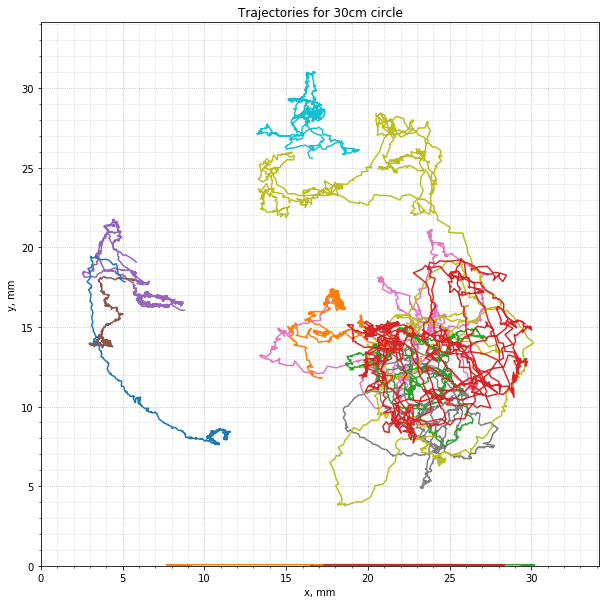

In [428]:
plot_trajectories(data, [i for i in range(0, len(data.columns) // 2)])

In [429]:
# Path ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def path(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        current = [0]
        for i in range(1, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[i - 1][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[i - 1][element * 2 + 1]
            value = current[-1] + np.sqrt(dxcur * dxcur + dycur * dycur)
            current.append(value)
        plt.plot(time_value, current, ':', c = 'steelblue')
        result.append(current)
        
    average_path = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_path.append(total)
    plt.plot(time_value, average_path, c = 'red')
    plt.plot(time_value, [RADIUS * 10] * len(time_value), c = 'black')
    ax.set_xlabel('t, s')
    ax.set_ylabel('length, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth = '0.5')
    plt.title('Path length for ' + str(RADIUS * 2) + 'cm circle')

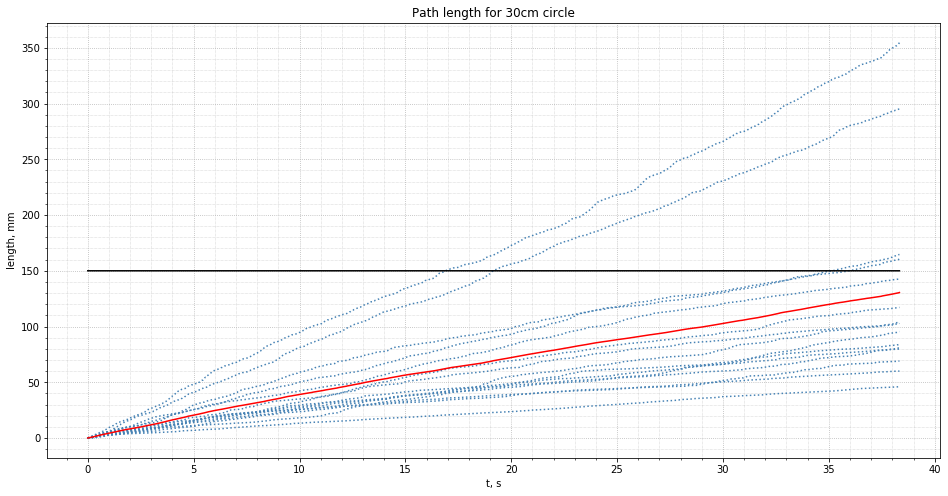

In [430]:
path(data, [i for i in range(0, len(data.columns) // 2)])

In [431]:
# Distance ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_distance(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        dist = []
        for i in range(0, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[0][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[0][element * 2 + 1]
            dist.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data))]
        plt.plot(time_value, dist, ':', c = 'steelblue')
        result.append(dist)
        
    average_dist = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_dist.append(total)
    plt.plot(time_value, average_dist, c = 'red')
    plt.plot(time_value, [RADIUS] * len(time_value), c = 'black')
    
    ax.set_xlabel('t, s')
    ax.set_ylabel('distance, сm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth='0.5')
    plt.title('Distance for ' + str(RADIUS * 2) + 'cm circle')

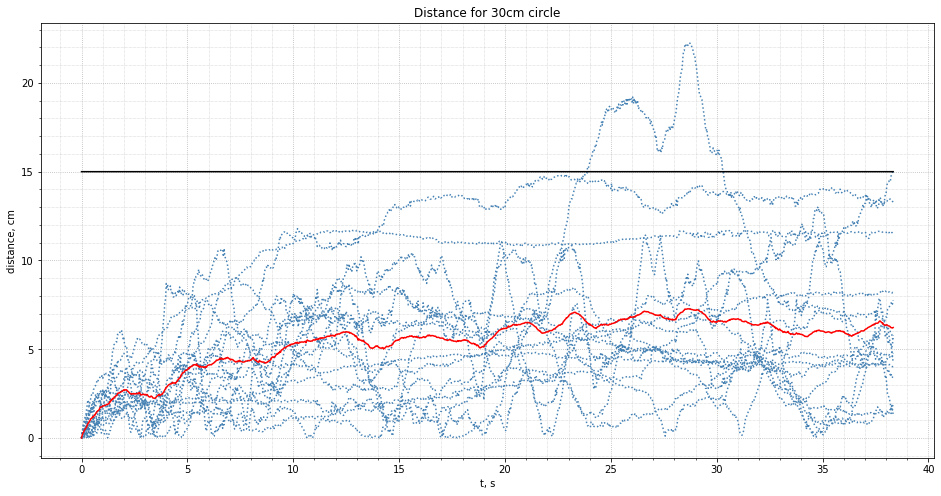

In [432]:
plot_distance(data, [i for i in range(0, len(data.columns) // 2)])

In [433]:
# Distance from center ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def center_distance(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        dist = []
        for i in range(0, len(data.values)):
            dxcur = data.values[i][element * 2] - MILLIMETERS_IN_PIXEL * WIDTH / 2
            dycur = data.values[i][element * 2 + 1] - MILLIMETERS_IN_PIXEL * HEIGHT / 2
            dist.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data))]
        plt.plot(time_value, dist, ':', c = 'steelblue')
        result.append(dist)
        
    average_dist = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_dist.append(total)
    plt.plot(time_value, average_dist, c = 'red')
    plt.plot(time_value, [RADIUS] * len(time_value), c = 'black')
    
    ax.set_xlabel('t, s')
    ax.set_ylabel('distance, сm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth='0.5')
    plt.title('Distance from center for ' + str(RADIUS * 2) + 'cm circle')

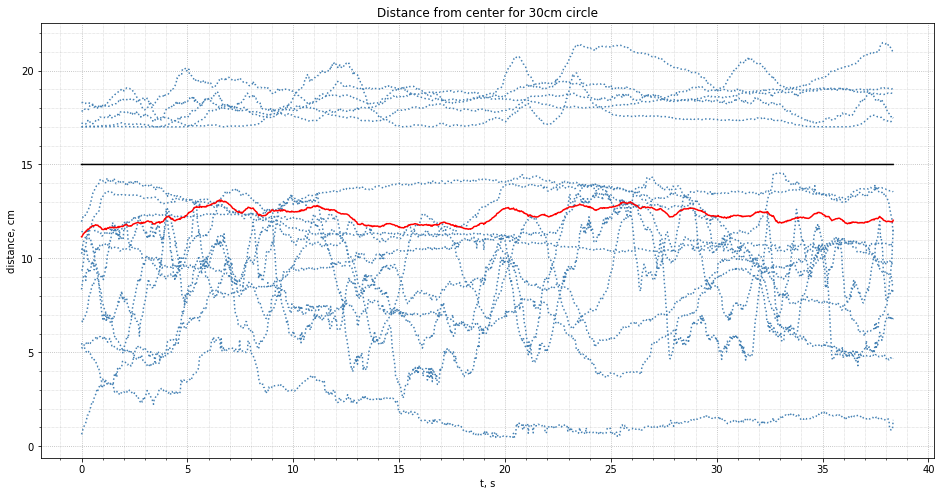

In [434]:
center_distance(data, [i for i in range(0, len(data.columns) // 2)])